<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Max, I am a reviewer on this project. Congratulations on submitting another project! 🎉

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved.
    
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review if you ask me to. 
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> you did a fantastic job here, thank you so much for submitting the project! The topic is hard, but your project is great! It has a clear structure, which enhances its readability. It also has a lot of charts and explanations, so the code is easy to read and the results are easy to understand. You have correctly conducted the analysis, answered all questions from the task and conducted statistical tests. I do not have any questions, so I can accept the project now. Good luck!
    
    


</div>

# A/B Testing Analysis 

I will analyze A/B testing data from an online store in three main parts:

1. Evaluation of nine revenue-boosting hypotheses proposed by the marketing team to determine implementation priorities.

2. Comparison of performance metrics between test groups, including cumulative revenue, average order size, and conversion rates.

3. Statistical analysis comparing conversion rates and average order sizes between groups, using both complete and filtered datasets (excluding anomalies). Based on these findings, we'll provide recommendations for next steps.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
There's an introduction, which is good. It is important to write an introductory part, because it gives an idea about the content of the project.
    
</div>



In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats as st
from IPython.display import display
import seaborn as sns

# Step 1: Hypothesis data importing and calculation
In this section, I will:

Import and check the data containing the 9 hypotheses;

Apply the ICE framework to prioritize hypotheses; and

Apply the RICE framework to prioritize hypotheses. 

In [2]:
hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
In order to change the *hypothesis* column's width, use `set_option` method: 

</div>

```pyhton

pd.set_option('max_colwidth', 100)

```

In [4]:
hypothesis.columns=hypothesis.columns.str.lower()

In [5]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['effort']

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Correct! 
</div>

In [6]:
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


The top 5 hypotheses with the highest ICE scores are numbers 8, 0, 7, 6, and 2.

Now to include 'reach' and calculate the RICE scores.

In [7]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] *
                     hypothesis['confidence'])/hypothesis['effort']

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Correct! 
</div>

In [8]:
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Judging from the RICE scores, the 5 most promising hypotheses are no. 7, 2, 0, 6, and 8. These are the same five as from the ICE calculation but in different order. This is because if Reach is low, a hypothesis would be ranked higher in ICE but lower in RICE.
If Reach is high, a hypothesis might be ranked higher in RICE than ICE.
The same top 5 hypotheses may appear in both rankings, but their order shifts based on how Reach influences their priority in RICE.

Now let's also make a scatterplot with the x asix showing the ICE score and y axis showing the RICE score.

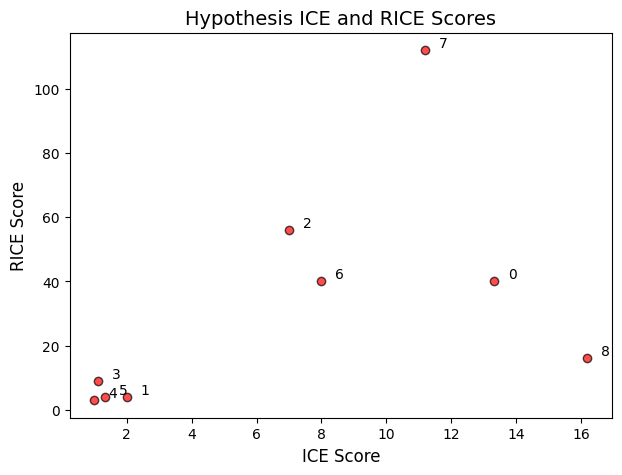

In [9]:
x = hypothesis['ICE']
y = hypothesis['RICE']
types = hypothesis.index  

fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(x, y, color='red', alpha=0.7, edgecolors='black')

ax.set_xlabel('ICE Score', fontsize=12)
ax.set_ylabel('RICE Score', fontsize=12)
ax.set_title('Hypothesis ICE and RICE Scores', fontsize=14)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10, 2), textcoords='offset points', fontsize=10)

plt.show()


The scatterplot visualization shows that hypotheses positioned toward the top and right are the most promising. The analysis reveals key differences between RICE and ICE scoring methods:

Hypothesis 7 (adding a subscription form to main pages) ranked highest using RICE due to its maximum reach score of 10, as it impacts all users. Conversely, Hypothesis 8 dropped from 1st place in ICE to 5th in RICE because of its minimal reach score of 1, since it only affects users during their birthday period.

While the prioritization method choice affects rankings, both approaches identified the same top five hypotheses for testing, making any of these viable candidates for implementation.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct. With RICE being used, we consider an additional factor that reflects the number of people or events. That is the reason why RICE prioritization differs from that of the ICE. 
</div>

# Part 1 summary: 
In this section, I imported the data containing the 9 hypotheses and calcuated their ICE and RICE scores. Based on the results, the company can decide which hypotheses to test and which to test first.

For this project, it hasn't been noted which specific hypothesis is being tested using the A/B test. However, based on the tasks, we can speculate that it is possibly hypothesis 2, which says adding recommendation blocks to the site will boost both conversion rate and average purchase size.

In the next section, I will work with the results of the A/B test.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Good! 

</div>

# Part 2: Visitors and orders data importing and preprocessing

In [10]:
orders = pd.read_csv('/datasets/orders_us.csv', parse_dates=['date'])

In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [12]:
orders.duplicated().sum()

0

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Duplicates can impair the quality of the analysis, so it is an important step. Good job.


</div>

In [13]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [14]:
display(orders['date'].min(), orders['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [15]:
orders['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

In [16]:
visits = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'])

In [17]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
visits.duplicated().sum()

0

In [19]:
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [20]:
display(visits['date'].min(), visits['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct. It is quite useful to check the date values. 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
It will be great if you add a conclusion. 
    
</div>

In [21]:
visits['visits'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visits, dtype: float64

In [22]:
#How big is each group.
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [23]:
print('Number of unique users in the data:', orders['visitorId'].nunique(),
      '\nNumber of unique users in group A:',
      orders[orders['group'] == 'A']['visitorId'].nunique(),
      '\nNumber of unique users in group B:',
      orders[orders['group'] == 'B']['visitorId'].nunique())

Number of unique users in the data: 1031 
Number of unique users in group A: 503 
Number of unique users in group B: 586


Although we saw above that group A has 557 transaction reports and group B has 640, we can see below that the the number of unique visitorId are 503 in group A and group B 586. This means that there are users who show in both groups

In [24]:
usersA = orders[orders['group'] =='A']['visitorId'].unique()
usersB = orders[orders['group'] =='B']['visitorId'].unique()
usersAB = np.intersect1d(usersA, usersB)
len(usersAB)

58

In [25]:
len(orders[orders['visitorId'].isin(usersAB)])

181

A data quality issue was identified where 58 users appeared in both test groups A and B, accounting for 181 transactions (approximately 15% of the total 1,197 orders). This overlap likely resulted from either an error in traffic distribution or data entry, and should be considered when interpreting the results.

Although removing these transactions means losing 15% of our data, it's necessary to eliminate this contaminated data to ensure accurate conclusions. We will proceed with the analysis using the cleaned dataset.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Good. 
    
</div>

In [26]:
orders = orders[~orders['visitorId'].isin(usersAB)]
orders.shape

(1016, 5)

In [27]:
orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

# Part 2 summary 
After data cleaning by removing users who appeared in both test groups, our final dataset contains 468 orders from Group A and 548 from Group B (a reduction of 181 records). The data is now ready for analysis, though we should note potential outliers in the revenue column that may need attention in our subsequent analysis.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Well done!     
</div>

# Part 3: Analysis of the A/B test

In this section, we will use the visits and orders datasets to calculate and plot the following:

1. Cumulative revenue by group;
2. Cumulative average order size by group;
3. The relative difference in cumulative average order size for group B compared with group A; and
4. Daily and cumulative conversion rates of the two groups.

In [28]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [29]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


3.1 Cumulative revenue by group
First, to create a DatesGroup dataframe that only contains the unique combination of date and group, and aggregate the orders data to get the accumulative number of orders and visitors, as well as revenue.

In [30]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders[
        'group'] == x['group'])].agg({
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum'
        }),
    axis=1).sort_values(by=['date', 'group'])

In [31]:
visitorsAggregated = datesGroups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits[
        'group'] == x['group'])].agg({
            'date': 'max',
            'group': 'max',
            'visits': 'sum'
        }),
    axis=1).sort_values(by=['date', 'group'])

Now to merge the two aggregated datasets so we have the orders, users, revenue, and visitors information for each unique date and group combination.

In [32]:
cumulative_Data = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_Data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [33]:
cumulative_Data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


Now I'll create two subsets containing the group A and group B records respectively, and plot the accumulative revenue for both groups on the same graph.

In [34]:
cumulativeRevenueA = cumulative_Data[cumulative_Data['group'] == 'A'][[
    'date', 'revenue', 'orders'
]]
cumulativeRevenueB = cumulative_Data[cumulative_Data['group'] == 'B'][[
    'date', 'revenue', 'orders'
]]

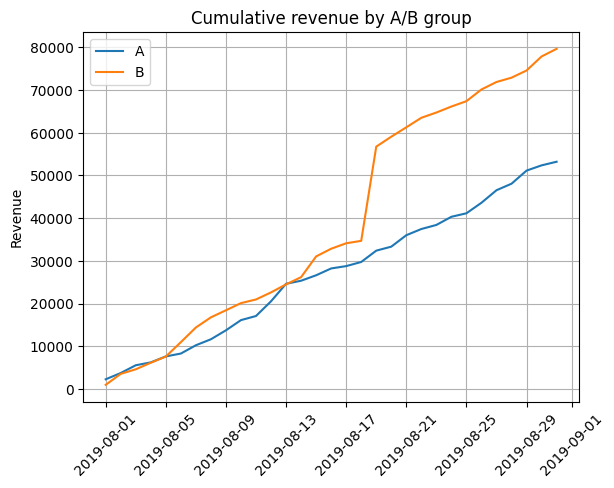

In [35]:
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue'], 
         label='A')
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue'], 
         label='B')
plt.legend()
plt.ylabel('Revenue')
plt.title('Cumulative revenue by A/B group')
plt.xticks(rotation=45)
plt.grid()
plt.show()

The cumulative revenue analysis shows both groups maintained similar growth rates until mid-August, when Group B experienced a sudden spike, gaining a lead of over 20,000 in revenue which persisted through the month. This jump likely resulted from one or more unusually large orders in Group B. After this spike, both groups resumed similar growth patterns. While the overall trends are comparable between groups, we'll need to examine the mid-August anomaly in Group B for a more accurate comparison.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Good! 
</div>

3.2 Cumulative average order size by group

Next, let's plot the cumulative average order size by A/B group. We will calculate this as the cumulative revenue divided by the cumulative number of orders.

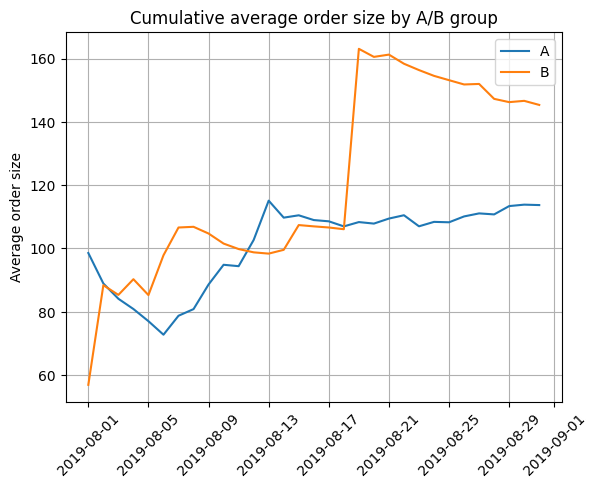

In [36]:
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
         label='A')
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
         label='B')
plt.legend()
plt.ylabel('Average order size')
plt.title('Cumulative average order size by A/B group')
plt.xticks(rotation=45)
plt.grid()
plt.show()

The average order size analysis shows initial fluctuations in both groups prior to mid-August, making it difficult to determine which group performed better. Group B then experienced a significant spike, followed by a gradual decrease. This spike likely corresponds to some exceptionally large orders in mid-August. While Group A's average order size appears to stabilize between 100 and 120, more data is needed to determine Group B's true average purchase size after the anomaly.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Correct! 
    
</div>

3.3 Relative difference in cumulative average order size(B compared with A)

Now let's plot a relative difference graph for the average purchase sizes for B group compared with A group. We will merge the two subsets first and then calculate the difference and plot it.

In [37]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

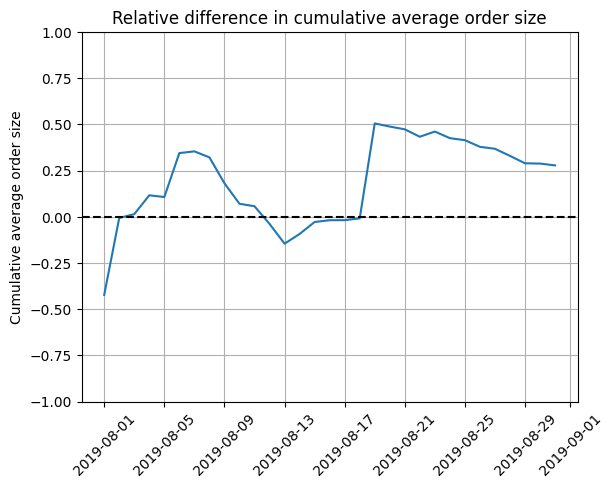

In [38]:
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
    /
    (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])
    - 1)
plt.title('Relative difference in cumulative average order size')
plt.ylabel('Cumulative average order size')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylim(-1, 1)
plt.grid()
plt.show()

The comparison of relative purchase sizes between groups shows fluctuating patterns. Group B's apparent advantage is largely influenced by the suspicious large order(s), resulting in more gains than losses. However, the downward trend following the spike suggests that after removing these anomalies, Group B might actually show relative losses in the test's final two weeks. This will be examined further in our detailed analysis.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Correct! 
    
</div>

3.4 Daily conversion rates of the A/B group

First, we will calculate and plot the daily conversion rate of the A/B group. We will calculate this as the number of orders divided by the number of visitors.

Let's create the dataframe containing the daily conversion rate for both groups.

In [39]:
ordersByGroup = orders.groupby(['group', 'date']).agg(
    {'transactionId': 'count'}).reset_index()
ordersByGroup.columns=['group', 'date', 'orders']
dailyConversion = ordersByGroup.merge(visits, on=['group', 'date'])
dailyConversion['conversion'] = dailyConversion['orders']/dailyConversion['visits']
dailyConversion.head()

,group,date,orders,visits,conversion
0,A,2019-08-01,23,719,0.031989
1,A,2019-08-02,19,619,0.030695
2,A,2019-08-03,24,507,0.047337
3,A,2019-08-04,11,717,0.015342
4,A,2019-08-05,22,756,0.029101


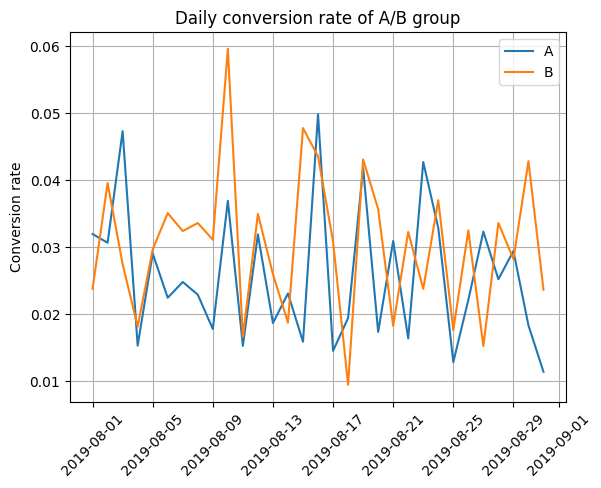

In [40]:
conversionA = dailyConversion[dailyConversion['group'] == 'A']
conversionB = dailyConversion[dailyConversion['group'] == 'B']
plt.plot(conversionA['date'], conversionA['conversion'], label='A')
plt.plot(conversionB['date'], conversionB['conversion'], label='B')
plt.legend()
plt.title('Daily conversion rate of A/B group')
plt.ylabel('Conversion rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

From the graph above, we can see some a clear spike in B ahead of A in the second week of August, but it's hard to tell overall which group is doing better becauase they both fluctuate strongly.

Let's plot the relative difference in daily conversion rate for B compared with A.

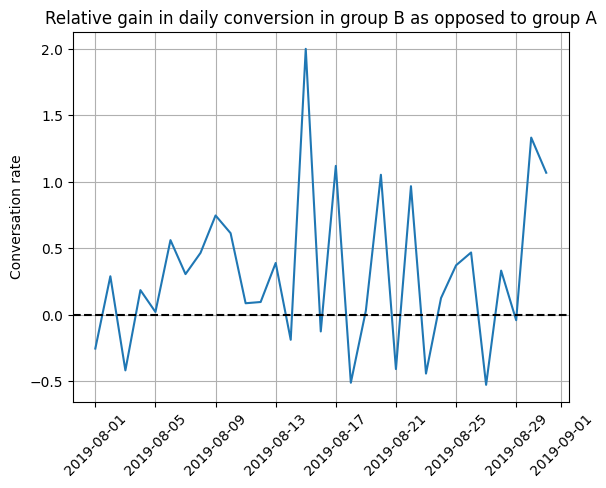

In [41]:
mergedDailyConversions = conversionA[['date', 'conversion']].merge(
    conversionB[['date', 'conversion']], on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedDailyConversions['date'],
         mergedDailyConversions['conversionB'] /
         mergedDailyConversions['conversionA'] - 1)
plt.title('Relative gain in daily conversion in group B as opposed to group A')
plt.axhline(y=0, color='black', linestyle='--')
#plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.ylabel('Conversation rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

We can see from the graph of the relative difference in daily conversion rate that overall there seem to be more relative gains in conversion rate for B group than losses. To get a clear picture of these gains, we will need to take a look at the cumulative conversion rates.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Looks correct! 
</div>

3.5 Cumulative conversion rates of the A/B group
Let's use the cumulativeData dataset and plot the cumulative conversion rates for the A/B group.

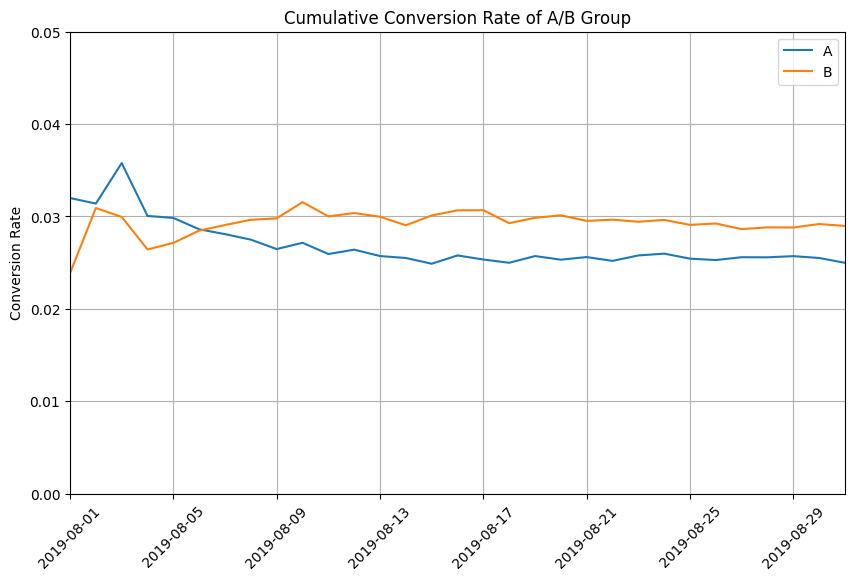

In [42]:
cumulative_Data['date'] = pd.to_datetime(cumulative_Data['date'])

cumulative_Data['conversion'] = cumulative_Data['orders'] / cumulative_Data['visitors']

cumulativeDataA = cumulative_Data[cumulative_Data['group'] == 'A']
cumulativeDataB = cumulative_Data[cumulative_Data['group'] == 'B']

plt.figure(figsize=(10, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

start_date = pd.to_datetime("2019-08-01")
end_date = pd.to_datetime("2019-08-31")

plt.legend()
plt.title('Cumulative Conversion Rate of A/B Group')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)

plt.xlim(start_date, end_date)
plt.ylim(0, 0.05)  

plt.grid()
plt.show()


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Good. 
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
You can change the Y axis range to enhance readability. 
</div>

Now it's quite clear that, after the first week in August, group B has been having a consistently higher cumulative conversion rates than group A. Let's look at the gain in conversion rates by plotting relative difference in them for group B compared with group A.

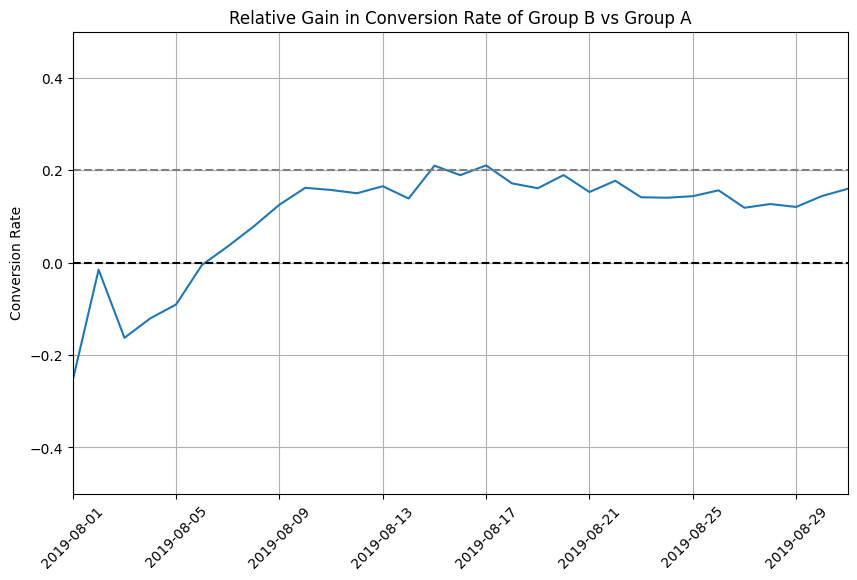

In [43]:
cumulative_Data['date'] = pd.to_datetime(cumulative_Data['date'])

mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']], on='date', how='left', suffixes=['A', 'B']
)

start_date = pd.to_datetime("2019-08-01")
end_date = pd.to_datetime("2019-08-31")

plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB'] / 
         mergedCumulativeConversions['conversionA'] - 1)

plt.title('Relative Gain in Conversion Rate of Group B vs Group A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.xlim(start_date, end_date)
plt.ylim(-0.5, 0.5)

plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Now we can see that, after the first week in August, group B's relative gain in cumulative conversion rates compared with group A climbed up to 0.2 and then fluctuates just slightly below that.

Group B seems to be doing consistently better than group A in terms of conversion rates. Still, we will also need to see what happens to this after removing the anomalies in the data.

# Part 3 summary

The analysis in this sections shows some interesting results. The cumulative revenue for group A and group B seem to rise at about the same rate, except for the spike in mid August for group B, possibly caused by some large order(s). There is no clear pattern in cumulative average purchase size for the two groups, except, again, a spike in mid August for group B. The relative difference in daily conversion rate for group B compared with group A seems to show more gains than losses, which became clear in graph for the relative difference in cumulative conversion rates: group B was leading consistently after the first week in August.

Next, we will take a closer look at the revenue and order number from the data and address the anomalies in these.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Great job! 
</div>

# Part 4: Detecting anomalies
In this section, we will carry out the following plots and calculations:

1. Scatter plot of the number of orders per user;
2. The 95th and 99th percentiles for the number of orders per user;
3. Scatter plot of order prices; and
4. The 95th and 99th percentiles of order prices.

4.1 Scatter plot of the number of orders per user

First create a dataframe containing the number of orders by user.

In [44]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({
    'transactionId':
    pd.Series.nunique,
    'group':
    'max'
})
ordersByUsers.columns=['visitorId', 'orders', 'group']

In [45]:
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders,group
908,3967698036,3,A
55,249864742,3,B
478,2108163459,3,A
687,2988190573,3,A
890,3908431265,3,A
138,611059232,3,A
632,2742574263,3,B
157,678354126,2,A
323,1404560065,2,B
452,1985475298,2,B


It doesn't seem that there are any outrageous numbers. Now a scatterplot to show the order number next.

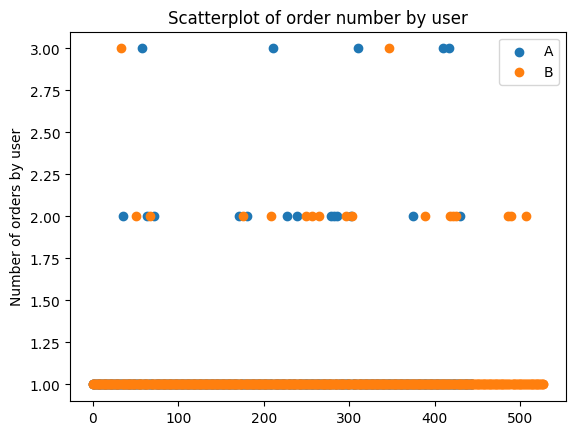

In [46]:
x_values_A = pd.Series(range(0, len(ordersByUsers[ordersByUsers['group'] == 'A']['orders'])))
x_values_B = pd.Series(range(0, len(ordersByUsers[ordersByUsers['group'] == 'B']['orders'])))
plt.scatter(x=x_values_A,
            y=ordersByUsers[ordersByUsers['group'] == 'A']['orders'],
            label='A')
plt.scatter(x=x_values_B,
            y=ordersByUsers[ordersByUsers['group'] == 'B']['orders'],
            label='B')
plt.legend()
plt.title('Scatterplot of order number by user')
plt.ylabel('Number of orders by user')
plt.show()

The scatterplot shows there are 7 users who have made 3 orders, among whom 2 are from B group and rest from A group. There are around a dozen users made 2 orders, and the rest all had 1 order.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
True. 
</div>

4.2 95th and 99th percentiles for the number of orders per user

Let's calculate the 95th and 99th percentiles for the order number per user.

In [47]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

99% of the users made 1 or 2 orders. We can consider the 1% 3 orders per user outliers, however, in this case, they are not by any sense extreme. Therefore let's keep them in the data.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Correct! 
</div>

4.3 Scatter chart of order prices

From previous calculation, we had the suspicion that there might be some expensive orders which caused the spike in cumulative revenue and purchase size in group B. Let's make a scatterplot of the order prices to see what these are.

Here we will make two scatterplots, one with full range of the revenue, the other with reduced range in order to get more details from it.

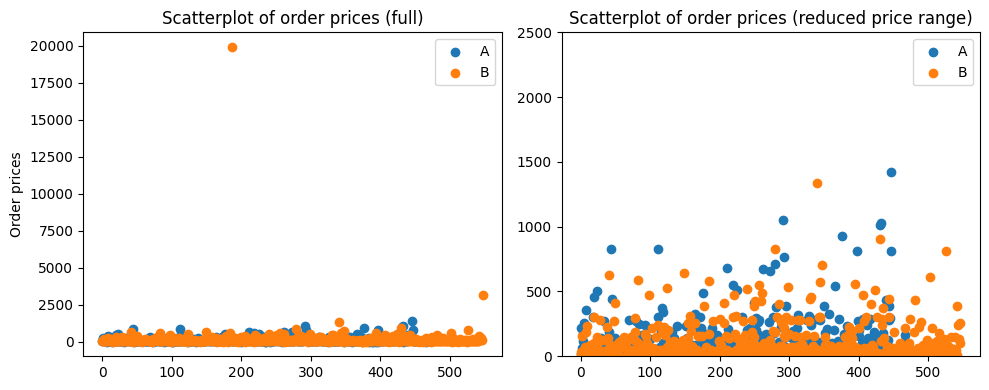

In [48]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))

x_values_A = pd.Series(range(0, len(orders[orders['group'] == 'A']['revenue'])))
x_values_B = pd.Series(range(0, len(orders[orders['group'] == 'B']['revenue'])))
ax1.scatter(x=x_values_A, y=orders[orders['group'] == 'A']['revenue'], label = 'A')
ax1.scatter(x=x_values_B, y=orders[orders['group'] == 'B']['revenue'], label = 'B')
ax1.set_title('Scatterplot of order prices (full)')
ax1.set_ylabel('Order prices')
ax1.legend()

ax2.scatter(x=x_values_A,
            y=orders[orders['group'] == 'A']['revenue'], label = 'A')
ax2.scatter(x=x_values_B,
            y=orders[orders['group'] == 'B']['revenue'], label ='B')
ax2.set_title('Scatterplot of order prices (reduced price range)')
ax2.set_ylabel('')
ax2.set_ylim(0, 2500)
ax2.legend()
plt.tight_layout()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Don't forget to add both axes labels. 
    
</div>

Here we can see the B group has an extremely large outlier order price, at almost 20000, and an not so extreme one floating above 2500. Taking both off the graph, we can see that majority of the order prices are under 1000, with just sevaral above.

Let's calculate the 95th and 99th percentiles next.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Agreed. 
</div>

4.4 95th and 99th percentiles of order prices

In [49]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

99% of the order prices are 830.3 and lower. Order prices above this point can be considered as anomalies. Given this information, as well as the information from the scatterplot, we can arbitrarily decide the cut off point as 1000 for outliers. When we perform the significance testing in the next section, we can filter out the anomalies based on this.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Everything is great! 
    
</div>

# Part 4 summary

In this section, using scatter plots and the percentile function, we identified the anomalies in the data. While 3 orders per user represents only 1 percent of the total users, the value itself is not extreme and thus will be kept in the data. On the other hand, while 99% of the order prices are 830.3 and below, the highest order is as extreme as almost 20000. Outliers like this severly skew the data and thus will need to be removed to get a clear understanding of the groups' performance.

# Part 5: Statistical significant testing

In this section, we will perform the following tests:

1. Statistical significance of the difference in conversion between the groups using the raw data;

2. Statistical significance of the difference in average order size between the groups using the raw data;

3. Statistical significance of the difference in conversion between the groups using the filtered data; and

4. Statistical significance of the difference in average order size between the groups using the filtered data.

5.1 Significance test of the difference in conversion rates using raw data
To test if the A and B group have the same conversion rates, we will use a two sided Mann Whitney U test.

The null hypothesis is that their conversion rates are the same; the alternative hypothesis is that they are different. Threshold for the significance level alpha will be set as 0.05.

First we will create two samples, A and B, which contains the visitors and the number of their orders of each group respectively.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
The hypotheses wording it correct. 
    
</div>

In [50]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby(
    'visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby(
    'visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

In [51]:
#Now to perform the test and also calculate the relative conversion gain for group B compared with group A.
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.011
0.160


The p-value is smaller than 0.05. Therefore we reject the null hypothesis, and conclude that there is a difference in conversion rates between the two groups. The relative gain of group B is 16%.

5.2 Significance test of the difference in average order size using raw data
Let's use the Mann Whitney U test to find out if the two groups have the same average order size. We'll also calculate group B's relative gain in average order size compared with A.

The null hypothesis is the two groups have the same average order size, and the alternative hypothesis is that they have different average order size.

We will set the significance level Alpha as 0.05.

In [52]:
revenueA = orders[orders['group'] == 'A']['revenue']
revenueB = orders[orders['group'] == 'B']['revenue']
print("{0:.3f}".format(
    st.mannwhitneyu(revenueA, revenueB, alternative='two-sided')[1]))
print("{0:.3f}".format(revenueB.mean() / revenueA.mean() - 1))

0.862
0.278


P-value is larger than alpha 0.05. Therefore we can't reject the null hypothesis that the two groups have the same average order size. Despite that, it can be see that group B has a relative gain of 27.8% in average purchase size compared with A. However, as mentioned earlier, this could be due to the anomalies in the data. Next, to perform the same tests using filtered data.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Good.     
</div>

5.3 Significance test of the difference in conversion rates using filtered data

Using results from previous sections on detecting anomalies in data, we decided that users who made orders higher than 1000 as anomaly users. Let's first find out who they are.

In [53]:
usersWithExpensiveOrders = orders[orders['revenue'] > 1000]['visitorId']
usersWithExpensiveOrders

425     1920142716
743     4133034833
744      888512513
1099     148427295
1103    1164614297
1136    1307669133
1196    2108080724
Name: visitorId, dtype: int64

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Makes sense. 
    
</div>

In [54]:
#There are 7 of them. Now to filter these users out and perform the Mann Whitney U test
#for the difference in conversion rate and average order size between the two groups.
sampleA_filtered = pd.concat([ordersByUsersA[~ordersByUsersA['visitorId'].isin(usersWithExpensiveOrders)]['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB_filtered = pd.concat([ordersByUsersB[~ordersByUsersB['visitorId'].isin(usersWithExpensiveOrders)]['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Correct.     
</div>

In [55]:
#now to perform the test on the two samples, print the pvalue, 
#and also calculate the relative gain in conversion rates for B group compared with A group.
print("{0:.3f}".format(
    st.mannwhitneyu(sampleA_filtered,
                    sampleB_filtered,
                    alternative='two-sided')[1]))
print("{0:.3f}".format(sampleB_filtered.mean() / sampleA_filtered.mean() - 1))

0.010
0.163


The p-value is still smaller than 0.05, so we can still reject the null hypothesis and conclude that there is a difference in the two groups' conversion rates.

The relative gain in conversion rates for B group is 16.3%, 0.3% higher than the results from the raw data.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Good.     
</div>

5.4 Significance test of the difference in average order size using filtered data

Now to use the filtered data to test if the average order size for the two groups are the same. The null and alternative hypothesis, as well as alpha remain the same as in previous test in section 5.2.

We will also calculate the relative gain in average order size for B group compared with A group.

In [56]:
revenueA = orders[(orders['group'] == 'A') & (
    ~orders['visitorId'].isin(usersWithExpensiveOrders))]['revenue']
revenueB = orders[(orders['group'] == 'B') & (
    ~orders['visitorId'].isin(usersWithExpensiveOrders))]['revenue']
print("{0:.3f}".format(st.mannwhitneyu(revenueA, revenueB, alternative='two-sided')[1]))
print("{0:.3f}".format(revenueB.mean()/revenueA.mean()-1))

0.927
-0.034


It's interesting, after removing the anomalous users who made some extremely large orders, the relative change for B group in average order size fell from a 27.8% gain, to a 3.4% loss! The anomalous users must mostly come from the B group.

The p-value of the test results is still higher than 0.05. So similarly, we can't reject the null hypothesis that the two groups have the same average order size.

Part 5 summary

The statistical analysis was conducted using both raw and filtered datasets. Key findings:

1. Conversion Rate Tests: Both raw and filtered data showed significant differences between groups, with Group B demonstrating approximately 16% higher conversion rates than Group A.

2. Average Purchase Size Tests: No statistically significant difference was found between groups. While the raw data suggested Group B had a 27.8% higher average purchase size (due to extremely large orders), after removing these anomalies, Group B actually showed a 3.4% lower average purchase size compared to Group A.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Excellent!     
</div>

Final findings and conclusions
Based on the analysis, we found:

1. Both raw and filtered data confirm a statistically significant difference in conversion rates between groups.

2. Average purchase size showed no statistically significant difference between groups. Raw data indicated a gain for Group B, while filtered data showed a slight loss.

3. Group B demonstrated consistently better conversion rates than Group A, with results stabilizing around the mean.

4. Average purchase size results remain inconclusive, showing fluctuations regardless of whether anomalies are included.

Recommendations:

We have two viable options:
1. Conclude the test as successful based on improved conversion rates alone, despite inconclusive average purchase size results.
2. Extend the test for another month, particularly if this is testing Hypothesis 2 (which has a low effort score of 3), to gather more conclusive data on average purchase size.

The choice depends on company priorities:
- If improved conversion rate alone justifies implementation, end the test now
- If proving both conversion and purchase size improvements is crucial, continue testing, especially given the low effort required

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
Excellent job!     
</div>